# Intro Of This Notebook

Epilepsy is a severe neurological disorder that manifests as a prevalent global health issue. It results from abnormal electrical discharges in the brain, leading to clinical symptoms. Epileptic seizures, representing the most common positive indicators of brain disturbance, categorize epilepsy as a primary brain disorder. The leading causes of epilepsy include vascular factors, traumatic incidents, infections, brain abscesses, tumors, nutritional deficiencies, pyridoxine deficiency, and calcium metabolism disorders. To enhance our understanding of the mechanisms causing epileptic disorders, ongoing research is essential. The diagnosis of epilepsy relies significantly on the electroencephalogram (EEG), a critical tool for accurately classifying different forms of epilepsy and facilitating the evaluation and treatment of neurophysiological disorders.

## Method Selection

Towards the end, due to the rapid response, I came to the realization that employing SVM and PCA is more advantageous for swift detection. However, for heightened accuracy and prediction scenarios, CNN and DNN prove to be more effective. Consequently, my decision is to utilize  **CNN** for this specific dataset.

## About Dataset

This dataset is a pre-processed and re-structured/reshaped version of a very commonly used dataset featuring epileptic seizure detection.

## Attribute Information

The original dataset, as referenced, comprises 5 folders, each containing 100 files, with each file representing the brain activity recording of a single subject. These recordings span 23.6 seconds and are sampled into 4097 data points. Consequently, there are a total of 500 individuals, each contributing 4097 data points for a duration of 23.5 seconds.

To enhance the dataset's organization, we partitioned and shuffled every 4097 data points into 23 chunks. Each chunk consists of 178 data points, representing a 1-second interval. Therefore, the dataset now comprises 11,500 entries (rows), each containing 178 data points for 1 second (columns). The final column denotes the label "y" with values {1, 2, 3, 4, 5}.

In summary, the response variable "y" is found in column 179, while the explanatory variables X1, X2, …, X178 provide the EEG recording values at different time points.

## y Definition

The variable "y" denotes the category of the 178-dimensional input vector and specifically takes values in {1, 2, 3, 4, 5}, each corresponding to different conditions:

- 5: Eyes open, indicating the EEG signal recording when the patient had their eyes open.
- 4: Eyes closed, representing the EEG signal recording when the patient had their eyes closed.
- 3: Identification of the tumor region in the brain, recording EEG activity from the healthy brain area.
- 2: EEG recorded from the area where the tumor was located.
- 1: Recording of seizure activity.

Subjects falling into classes 2, 3, 4, and 5 are those without epileptic seizures, while subjects in class 1 experience epileptic seizures. Despite the existence of five classes, many authors have simplified the classification task to binary, focusing on class 1 (Epileptic seizure) versus the rest. The motivation behind creating this dataset version in a .csv format is to streamline data access.

## Reference

This Dataset collect from UCI Machine Learning Repository (from the University of Bonn).

## Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')

## Show the dataset

In [3]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Preprocess the data

In [4]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1:].values
y[y > 1] = 0  # Convert multi-class to binary

## Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

## Standardize the data

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Reshape the data for CNN

In [7]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

## Build the CNN model

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile the model

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model

In [10]:
history = model.fit(X_train_reshaped, y_train, epochs=150, batch_size=128, validation_split=0.2)

Epoch 1/150


54/54 [==============================] - 3s 25ms/step - loss: 0.3038 - accuracy: 0.8891 - val_loss: 0.1241 - val_accuracy: 0.9501
Epoch 2/150
54/54 [==============================] - 1s 19ms/step - loss: 0.1136 - accuracy: 0.9541 - val_loss: 0.1042 - val_accuracy: 0.9530
Epoch 3/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0973 - accuracy: 0.9590 - val_loss: 0.0998 - val_accuracy: 0.9554
Epoch 4/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0931 - accuracy: 0.9587 - val_loss: 0.1121 - val_accuracy: 0.9548
Epoch 5/150
54/54 [==============================] - 1s 18ms/step - loss: 0.0849 - accuracy: 0.9619 - val_loss: 0.0951 - val_accuracy: 0.9594
Epoch 6/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0782 - accuracy: 0.9665 - val_loss: 0.0917 - val_accuracy: 0.9629
Epoch 7/150
54/54 [==============================] - 1s 18ms/step - loss: 0.0720 - accuracy: 0.9723 - val_loss: 0.0897 - val_accuracy: 0.9664
Epoc

Epoch 55/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.1442 - val_accuracy: 0.9797
Epoch 56/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.1389 - val_accuracy: 0.9797
Epoch 57/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.1381 - val_accuracy: 0.9809
Epoch 58/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1630 - val_accuracy: 0.9791
Epoch 59/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.1527 - val_accuracy: 0.9809
Epoch 60/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.1370 - val_accuracy: 0.9820
Epoch 61/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0040 - accuracy: 0.9981 - val_loss: 0.1401 - val_accuracy: 0.9786

54/54 [==============================] - 1s 19ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1847 - val_accuracy: 0.9780
Epoch 113/150
54/54 [==============================] - 1s 19ms/step - loss: 7.7737e-04 - accuracy: 0.9997 - val_loss: 0.2062 - val_accuracy: 0.9774
Epoch 114/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.1738 - val_accuracy: 0.9786
Epoch 115/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.1752 - val_accuracy: 0.9803
Epoch 116/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.1501 - val_accuracy: 0.9820
Epoch 117/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1413 - val_accuracy: 0.9797
Epoch 118/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.1706 - val_accuracy: 0.9797
Ep

## Evaluate the model

In [11]:
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

90/90 [==============================] - 0s 2ms/step


## Calculate and print the confusion matrix

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2267   18]
 [  37  553]]


## Calculate and print classification report

In [13]:
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2285
           1       0.97      0.94      0.95       590

    accuracy                           0.98      2875
   macro avg       0.98      0.96      0.97      2875
weighted avg       0.98      0.98      0.98      2875



## Calculate and print accuracy

In [14]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9808695652173913


## Plot training history

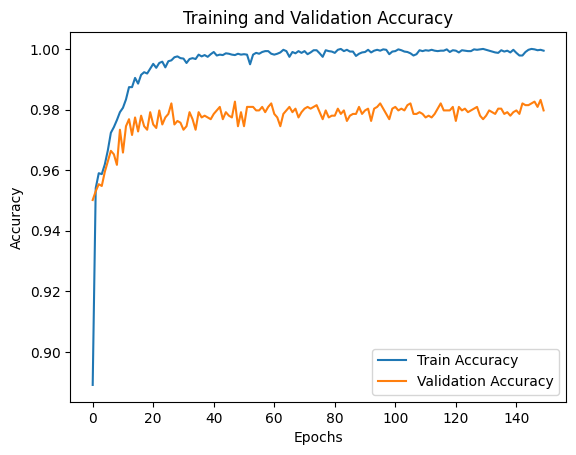

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()